# Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, \
auc, f1_score, fbeta_score

In [2]:
original_df=pd.read_csv('Final_obesity_dataset.csv', index_col=0)
df=original_df.copy()
df

,Gender,Age,Height,Weight,fam_hist,high_cal_foods,veg,num_main_meals,food_between_meals,nicotine,...,physical_activity,time_using_tech_devices,alcohol,transportation,obesity_lvl,BMI,age_group,new_obesity_4lvls,obese,new_obesity_7lvls
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,1.0,0.0,...,0.0,1.0,0.0,1.0,Normal_Weight,24.387,1.0,1.0,0.0,1.0
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,1.0,1.0,...,3.0,0.0,1.0,1.0,Normal_Weight,24.238,1.0,1.0,0.0,1.0
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,1.0,0.0,...,2.0,1.0,2.0,1.0,Normal_Weight,23.765,2.0,1.0,0.0,1.0
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,1.0,0.0,...,2.0,0.0,2.0,2.0,Overweight_Level_I,26.852,3.0,2.0,1.0,2.0
4,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,Overweight_Level_II,28.342,2.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,1.0,25.0,1.66,68.0,0.0,1.0,2.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,Normal_Weight,24.677,3.0,1.0,0.0,1.0
492,1.0,45.0,1.70,86.0,0.0,1.0,3.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,Overweight_Level_II,29.758,3.0,2.0,1.0,3.0
494,0.0,18.0,1.67,66.0,0.0,1.0,3.0,3.0,1.0,0.0,...,0.0,0.0,1.0,1.0,Normal_Weight,23.665,0.0,1.0,0.0,1.0
496,1.0,18.0,1.72,53.0,1.0,1.0,2.0,3.0,1.0,0.0,...,0.0,2.0,1.0,1.0,Underweight,17.915,0.0,0.0,0.0,0.0


In [3]:
df.obesity_lvl.value_counts()

Normal_Weight          276
Overweight_Level_II     57
Overweight_Level_I      55
Obesity_Type_I          44
Underweight             34
Obesity_Type_II         10
Obesity_Type_III         3
Name: obesity_lvl, dtype: int64

In [4]:
df['obese'].value_counts()

0.0    310
1.0    169
Name: obese, dtype: int64

Since this dataset is imbalanced, accuracy might not be the best scoring method. We later split the data 50/50 due to the small data size.

In [5]:
models=pd.DataFrame(index=['Logistic Regression', 'Random Forest Classifier', 'XGB Classifier'],\
                    columns=['Best_params', 'Optimal_features', 'ROC_AUC'])


## 1. Logistic Regression

In [6]:
cols=['age_group', 'veg', 'num_main_meals', 'daily_water', 'physical_activity', 'time_using_tech_devices', 'food_between_meals', 'alcohol', 'Gender', 'fam_hist', 'high_cal_foods', 'cal_consumption_monitoring', 'nicotine', 'transportation']
X=df[cols]
y=df[['obese']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)

In [7]:
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:
clf=LogisticRegression(random_state=16)
param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg_cv=GridSearchCV(clf, param_grid, scoring='roc_auc', cv=10)
logreg_cv.fit(X_train_scaled, y_train)
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.1}
Tuned Logistic Regression Score: 0.7216666666666667


In [9]:
cols=['age_group', 'fam_hist', 'physical_activity', 'Gender', 'food_between_meals']
X=df[cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)

In [10]:
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
clf=LogisticRegression(random_state=16)
param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg_cv=GridSearchCV(clf, param_grid, scoring='roc_auc', cv=10)
logreg_cv.fit(X_train_scaled, y_train)
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))
models.Best_params[0]=logreg_cv.best_params_
models.Optimal_features[0]=cols
models.ROC_AUC[0]=logreg_cv.best_score_

Tuned Logistic Regression Parameter: {'C': 1}
Tuned Logistic Regression Accuracy: 0.725


## 2. Random Forest Classifier

In [11]:
cols=['age_group', 'veg', 'num_main_meals', 'daily_water', 'physical_activity', 'time_using_tech_devices', 'food_between_meals', 'alcohol', 'Gender', 'fam_hist', 'high_cal_foods', 'cal_consumption_monitoring', 'nicotine', 'transportation']
X=df[cols]
y=df[['obese']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
param_grid={'n_estimators':[10, 50, 100, 300, 500, 700, 1000],
            'criterion':['gini', 'entropy'],
            'max_features':['auto', 'sqrt', 'log2'],
            'max_depth':[None, 1, 3, 5, 7, 15, 30]}
clf=RandomForestClassifier(random_state=16)
random_forest_cv=GridSearchCV(clf, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)

In [13]:
random_forest_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=16),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 3, 5, 7, 15, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 300, 500, 700, 1000]},
             scoring='roc_auc')

In [14]:
print("Tuned Random Forest Classifier Parameter: {}".format(random_forest_cv.best_params_))
print("Tuned Random Forest Classifier Score: {}".format(random_forest_cv.best_score_))

Tuned Random Forest Classifier Parameter: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}
Tuned Random Forest Classifier Score: 0.7381481481481481


In [15]:
cols=['age_group', 'fam_hist', 'physical_activity', 'daily_water', 'food_between_meals', 'veg', 'Gender', 'high_cal_foods']
X=df[cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [16]:
param_grid={'n_estimators':[10, 50, 100, 300, 500, 700, 1000],
            'criterion':['gini', 'entropy'],
            'max_features':['auto', 'sqrt', 'log2'],
            'max_depth':[None, 1, 3, 5, 7, 15, 30]}
clf=RandomForestClassifier(random_state=16)
random_forest_cv=GridSearchCV(clf, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)

In [17]:
random_forest_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=16),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 3, 5, 7, 15, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 300, 500, 700, 1000]},
             scoring='roc_auc')

In [18]:
print("Tuned Random Forest Classifier Parameter: {}".format(random_forest_cv.best_params_))
print("Tuned Random Forest Classifier Score: {}".format(random_forest_cv.best_score_))

Tuned Random Forest Classifier Parameter: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}
Tuned Random Forest Classifier Score: 0.7564814814814815


In [19]:
models.Best_params[1]=random_forest_cv.best_params_
models.Optimal_features[1]=cols
models.ROC_AUC[1]=random_forest_cv.best_score_

Random Forest Classifier seems like a better model to use than Logistic Regression.

## 3. Extreme Gradient Boosting

In [20]:
cols=['age_group', 'veg', 'num_main_meals', 'daily_water', 'physical_activity', 'time_using_tech_devices', 'food_between_meals', 'alcohol', 'Gender', 'fam_hist', 'high_cal_foods', 'cal_consumption_monitoring', 'nicotine', 'transportation']
X=df[cols]
y=df[['obese']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [21]:
param_grid={'n_estimators':[10, 50, 100, 300, 500],
            'max_depth':[1, 3, 15, None],
           'colsample_bytree':[0.1, 0.3, 0.5, 0.7, 1]}
clf=XGBClassifier(random_state=16, use_label_encoder=False)
xgb_cv=GridSearchCV(clf, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
xgb_cv.fit(X_train_scaled, y_train)
print("Tuned XGB Classifier Parameter: {}".format(xgb_cv.best_params_))
print("Tuned XGB Classifier Score: {}".format(xgb_cv.best_score_))

[18:41:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned XGB Classifier Parameter: {'colsample_bytree': 0.1, 'max_depth': 3, 'n_estimators': 100}
Tuned XGB Classifier Score: 0.7469444444444444


In [22]:
cols=['age_group', 'fam_hist', 'physical_activity', 'Gender', 'daily_water']
X=df[cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
param_grid={'n_estimators':[10, 50, 100, 300, 500],
            'max_depth':[1, 3, 5, 15, 30, None],
           'colsample_bytree':[0.1, 0.3, 0.5, 0.7, 1]}
clf=XGBClassifier(random_state=16, use_label_encoder=False)
xgb_cv=GridSearchCV(clf, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
xgb_cv.fit(X_train_scaled, y_train)
print("Tuned XGB Classifier Parameter: {}".format(xgb_cv.best_params_))
print("Tuned XGB Classifier Score: {}".format(xgb_cv.best_score_))

[18:42:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned XGB Classifier Parameter: {'colsample_bytree': 1, 'max_depth': 1, 'n_estimators': 50}
Tuned XGB Classifier Score: 0.7501388888888888


In [24]:
models.Best_params[2]=xgb_cv.best_params_
models.Optimal_features[2]=cols
models.ROC_AUC[2]=xgb_cv.best_score_

In [25]:
pd.set_option('display.max_colwidth', None)
models

,Best_params,Optimal_features,ROC_AUC
Logistic Regression,{'C': 1},"[age_group, fam_hist, physical_activity, Gender, food_between_meals]",0.725
Random Forest Classifier,"{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}","[age_group, fam_hist, physical_activity, daily_water, food_between_meals, veg, Gender, high_cal_foods]",0.756481
XGB Classifier,"{'colsample_bytree': 1, 'max_depth': 1, 'n_estimators': 50}","[age_group, fam_hist, physical_activity, Gender, daily_water]",0.750139


XGB Classifier seems to be a good model, but Random Forest Classifier results in a slightly better score.

# Analysis of the Random Forest Classifier

In [26]:
cols=['age_group', 'fam_hist', 'physical_activity', 'daily_water', 'food_between_meals', 'veg', 'Gender', 'high_cal_foods']
X=df[cols]
print(cols)

['age_group', 'fam_hist', 'physical_activity', 'daily_water', 'food_between_meals', 'veg', 'Gender', 'high_cal_foods']


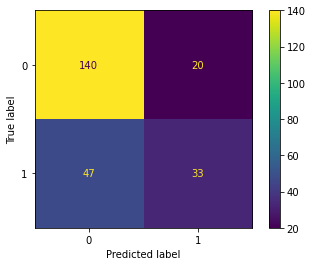

              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81       160
         1.0       0.62      0.41      0.50        80

    accuracy                           0.72       240
   macro avg       0.69      0.64      0.65       240
weighted avg       0.71      0.72      0.70       240



In [27]:
clf=RandomForestClassifier(random_state=16, criterion='entropy', max_depth=3, max_features='log2', n_estimators=50)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=16)
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf.fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
y_pred_prob=clf.predict_proba(X_test_scaled)[:,1]
cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.grid(False)
plt.show()
print(classification_report(y_test, y_pred))

$Precision=\frac{TP}{TP+FP}$, $Recall=\frac{TP}{TP+FN}$ 

We see that true negatives (not overweight/obese) were much easier to predict than true positives (overweight/obese). 

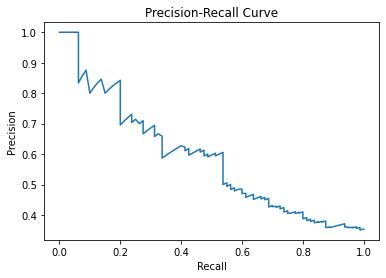

In [28]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred_prob)
fig, ax=plt.subplots()
ax.plot(recall, precision)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
plt.show()

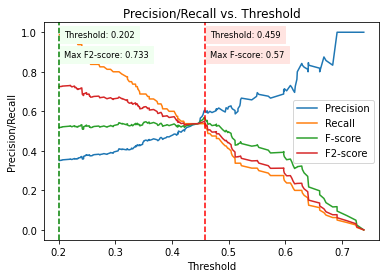

In [29]:
fig, ax=plt.subplots()
ax.plot(threshold, precision[1:], label='Precision')
ax.plot(threshold, recall[1:], label='Recall')


ax.set_xlabel('Threshold')
ax.set_ylabel('Precision/Recall')
ax.set_title('Precision/Recall vs. Threshold')

fscore=2*(precision*recall)/(precision+recall)
f_ix=np.argmax(fscore)

f2=fbeta_score(y_test, y_pred, beta=2)

f2score=(5*precision*recall)/((4*precision)+recall)

f2_ix=np.argmax(f2score)

ax.plot(threshold, fscore[1:], label='F-score')
ax.plot(threshold, f2score[1:], label='F2-score')

ax.axvline(threshold[f_ix], linestyle='dashed', color='red')
plt.text(threshold[f_ix]*1.02,0.975, 'Threshold: '+str(np.round(threshold[f_ix], 3)), fontsize='small', backgroundcolor='mistyrose')
plt.text(threshold[f_ix]*1.02, 0.875,  'Max F-score: '+str(np.round(fscore[f_ix], 3)), fontsize='small', backgroundcolor='mistyrose')

ax.axvline(threshold[f2_ix], linestyle='dashed', color='green')
plt.text(threshold[f2_ix]*1.04, 0.975, 'Threshold: '+str(np.round(threshold[f2_ix], 3)), fontsize='small', backgroundcolor='honeydew')
plt.text(threshold[f2_ix]*1.04, 0.875, 'Max F2-score: '+str(np.round(f2score[f2_ix], 3)), fontsize='small', backgroundcolor='honeydew')
ax.legend()
plt.show()



The threshold that best balances precision and recall is one that gives the maximum F-score, where $F=2\cdot\frac{precision \cdot recall}{precision+recall}=\frac{2\cdot TP}{2\cdot TP + FP + FN}$.

We want to minimize false negatives (false predictions that someone is under/normal weight when overweight/obese) - we can look at the F2-score, where $F_2=\frac{(1+\beta^2)\cdot Precision\cdot Recall}{(\beta^2 \cdot Precision+Recall)}$, $\beta = 2$. This puts more importance on recall and less on precision.


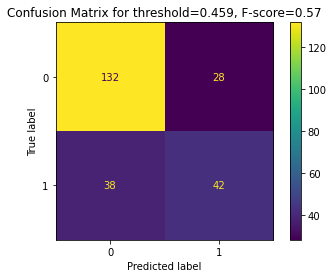

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       160
         1.0       0.60      0.53      0.56        80

    accuracy                           0.73       240
   macro avg       0.69      0.68      0.68       240
weighted avg       0.72      0.72      0.72       240



In [30]:
fthreshold = 0.459

y_pred = (y_pred_prob >= fthreshold).astype('int')

cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix for threshold=0.459, F-score=0.57')
plt.show()
print(classification_report(y_test, y_pred))

True positives (true predictions of overweightness/obesity) increased from 33 to 42 with a threshold of 0.459 (obtained with the maximum F-score). True negatives only decreased from 140 to 132. Perhaps false negatives can decrease further with the F2 threshold.

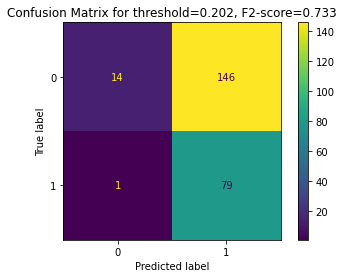

              precision    recall  f1-score   support

         0.0       0.93      0.09      0.16       160
         1.0       0.35      0.99      0.52        80

    accuracy                           0.39       240
   macro avg       0.64      0.54      0.34       240
weighted avg       0.74      0.39      0.28       240



In [31]:
f2threshold = 0.202

y_pred = (y_pred_prob >= f2threshold).astype('int')

cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix for threshold=0.202, F2-score=0.733')
plt.show()
print(classification_report(y_test, y_pred))

The threshold of 0.202 resulted in 79 true positives and 1 false negative. However, there were 146 false positives (predictions that individuals were overweight/obese when they are not).